# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

# Question 1

In [41]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]
A_B = A.extend(B)
print(A_B)

None


In [7]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
fuel = pd.read_csv("datasets/fuel_ferc1.csv")
fuel.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [11]:
fuel.fuel_mmbtu_per_unit.quantile(.75)

17.006

In [12]:
fuel.fuel_mmbtu_per_unit.std()

10.600220307806714

In [13]:
fuel.fuel_qty_burned.skew()

15.851495469109503

In [14]:
fuel.fuel_qty_burned.kurtosis()

651.3694501337732

In [15]:
fuel.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [17]:
(180/len(fuel))*100

0.609694136774718

In [18]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [21]:
fuel[fuel.fuel_cost_per_unit_delivered == fuel.fuel_cost_per_unit_delivered.max()]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
3564,f1_fuel_1997_12_9_0_8,9,1997,peach bt 2&3,nuclear,gramsU,210474.0,0.000065,37.847,7964521.0,0.578


In [22]:
fuel.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [29]:
fuel[fuel.fuel_type_code_pudl=="coal"].groupby("report_year")["fuel_cost_per_unit_burned"].pct_change().head()

0         NaN
1   -0.000538
2    1.137783
3    0.188570
5   -0.062910
Name: fuel_cost_per_unit_burned, dtype: float64

In [31]:
fuel[fuel.fuel_cost_per_unit_burned==fuel.fuel_cost_per_unit_burned.min()]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
7733,f1_fuel_2000_12_194_3_3,194,2000,nelson dewey unit 2,waste,ton,39.0,0.0155,-276.08,-174.67,-8.906


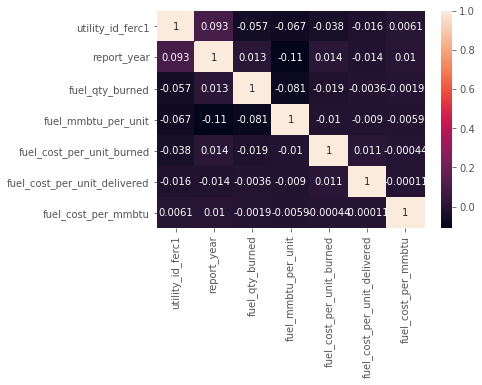

In [36]:
sns.heatmap(fuel.corr(), annot=True)